In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from MyConfig import MY_SEED, daq_features, eyetrk_features
from MyDataLoader import daq_dataloader, raw_eyetrk_dataloader, combined_dataloader
from MyPlots import plt_conf_matrix, plt_feat_important

np.random.seed(MY_SEED)

In [2]:
df = combined_dataloader(daq_features + eyetrk_features, methods=['mean', 'std'])
y = df['Label']
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc=le.transform(y)
df['Label_enc'] = le.transform(y)

print('encoded_classes', classes)
df

(33599, 12)
(33599, 12)
(33599, 12)
(33599, 12)
df_wind.shape (1120, 23)
encoded_classes ['construct' 'deer' 'rain' 'tire']


VDS_Brake_Pedal_Force0           VDS_Veh_Speed0            \
                      mean       std           mean       std   
0                 2.779949  0.027025      59.389098  0.029826   
1                 2.784344  0.019766      59.213344  0.093650   
2                 2.782879  0.020483      58.783205  0.140845   
3                 2.779949  0.021539      58.305770  0.139037   
4                 2.779949  0.021539      57.872129  0.113255   
..                     ...       ...            ...       ...   
275               0.000000  0.000000      41.056755  0.240191   
276               0.000000  0.000000      40.242132  0.238146   
277               0.000000  0.000000      39.433176  0.236462   
278               0.000000  0.000000      38.655193  0.214165   
279               0.000000  0.000000      38.049733  0.133293   

    VDS_Steering_Wheel_Angle0           VDS_Steering_Wheel_Angle_Rate0  \
                         mean       std                           mean   
0                    1.108704  0.483393                       2.273400   
1                    1.295013  0.420524                      -2.463603   
2                   -0.388184  0.389924                      -2.301934   
3                    0.576324  0.478499                       3.013692   
4                    0.872040  0.000000                       0.000000   
..                        ...       ...                            ...   
275                 -0.826734  0.327350                      -2.110471   
276                 -0.075076  0.463311                       3.181621   
277                 -0.205536  0.290508                      -1.423836   
278                 -0.155640  0.185305                       0.711044   
279                 -0.922867  0.604929                      -4.409294   

              SCC_Lane_Deviation1            ... Lft Pupil Diameter            \
          std                mean       std  ...               mean       std   
0    3.268424           -0.076958  0.087795  ...           4.071440  0.082286   
1    3.350553           -0.303404  0.041494  ...           4.117113  0.078409   
2    2.991394           -0.387822  0.018906  ...           4.043004  0.098425   
3    4.096368           -0.499337  0.045180  ...           4.005969  0.095374   
4    0.000000           -0.638558  0.032874  ...           4.092506  0.146561   
..        ...                 ...       ...  ...                ...       ...   
275  2.994536            1.060422  0.105508  ...           2.711711  0.086840   
276  3.832606            1.409596  0.100667  ...           2.782243  0.065539   
277  2.786059            1.774090  0.113166  ...           2.737913  0.069451   
278  2.729937            2.161901  0.114175  ...           2.710782  0.072057   
279  3.949515            2.557010  0.116045  ...           2.689260  0.086748   

       Rt X Pos                Rt Y Pos             Rt Pupil Diameter  \
           mean         std        mean         std              mean   
0    537.564123  265.132348  429.630697  229.761614          4.021504   
1    108.836927   49.748514   57.564697   26.626543          3.819251   
2    606.970850   99.336437  603.399773  166.425920          4.154564   
3    652.467780    8.074032  536.555530    4.054701          4.181913   
4    663.987887    2.099295  544.138423    6.339403          4.235393   
..          ...         ...         ...         ...               ...   
275  652.629890   40.223229  619.645587   16.344701          2.828654   
276  691.327430   57.860607  612.067550   15.729470          2.849263   
277  559.956840   31.948463  629.031373   20.731379          3.035744   
278  536.481797   51.497731  639.953410   24.471979          2.964078   
279  533.257537   49.417732  651.673360   18.040666          2.985614   

              Label Label_enc  
          std                  
0    0.157960  tire         3  
1    0.130865  tire         3  
2    0.108607  tire         3  
3    0.089267  tire         3  

In [3]:
cols = df.columns.to_list()
for col in cols:
    if len(df[col].unique()) == 1:
        df.drop([col], axis=1, inplace=True)

print(df.shape)

(1120, 24)


In [4]:
df

VDS_Brake_Pedal_Force0           VDS_Veh_Speed0            \
                      mean       std           mean       std   
0                 2.779949  0.027025      59.389098  0.029826   
1                 2.784344  0.019766      59.213344  0.093650   
2                 2.782879  0.020483      58.783205  0.140845   
3                 2.779949  0.021539      58.305770  0.139037   
4                 2.779949  0.021539      57.872129  0.113255   
..                     ...       ...            ...       ...   
275               0.000000  0.000000      41.056755  0.240191   
276               0.000000  0.000000      40.242132  0.238146   
277               0.000000  0.000000      39.433176  0.236462   
278               0.000000  0.000000      38.655193  0.214165   
279               0.000000  0.000000      38.049733  0.133293   

    VDS_Steering_Wheel_Angle0           VDS_Steering_Wheel_Angle_Rate0  \
                         mean       std                           mean   
0                    1.108704  0.483393                       2.273400   
1                    1.295013  0.420524                      -2.463603   
2                   -0.388184  0.389924                      -2.301934   
3                    0.576324  0.478499                       3.013692   
4                    0.872040  0.000000                       0.000000   
..                        ...       ...                            ...   
275                 -0.826734  0.327350                      -2.110471   
276                 -0.075076  0.463311                       3.181621   
277                 -0.205536  0.290508                      -1.423836   
278                 -0.155640  0.185305                       0.711044   
279                 -0.922867  0.604929                      -4.409294   

              SCC_Lane_Deviation1            ... Lft Pupil Diameter            \
          std                mean       std  ...               mean       std   
0    3.268424           -0.076958  0.087795  ...           4.071440  0.082286   
1    3.350553           -0.303404  0.041494  ...           4.117113  0.078409   
2    2.991394           -0.387822  0.018906  ...           4.043004  0.098425   
3    4.096368           -0.499337  0.045180  ...           4.005969  0.095374   
4    0.000000           -0.638558  0.032874  ...           4.092506  0.146561   
..        ...                 ...       ...  ...                ...       ...   
275  2.994536            1.060422  0.105508  ...           2.711711  0.086840   
276  3.832606            1.409596  0.100667  ...           2.782243  0.065539   
277  2.786059            1.774090  0.113166  ...           2.737913  0.069451   
278  2.729937            2.161901  0.114175  ...           2.710782  0.072057   
279  3.949515            2.557010  0.116045  ...           2.689260  0.086748   

       Rt X Pos                Rt Y Pos             Rt Pupil Diameter  \
           mean         std        mean         std              mean   
0    537.564123  265.132348  429.630697  229.761614          4.021504   
1    108.836927   49.748514   57.564697   26.626543          3.819251   
2    606.970850   99.336437  603.399773  166.425920          4.154564   
3    652.467780    8.074032  536.555530    4.054701          4.181913   
4    663.987887    2.099295  544.138423    6.339403          4.235393   
..          ...         ...         ...         ...               ...   
275  652.629890   40.223229  619.645587   16.344701          2.828654   
276  691.327430   57.860607  612.067550   15.729470          2.849263   
277  559.956840   31.948463  629.031373   20.731379          3.035744   
278  536.481797   51.497731  639.953410   24.471979          2.964078   
279  533.257537   49.417732  651.673360   18.040666          2.985614   

              Label Label_enc  
          std                  
0    0.157960  tire         3  
1    0.130865  tire         3  
2    0.108607  tire         3  
3    0.089267  tire         3  

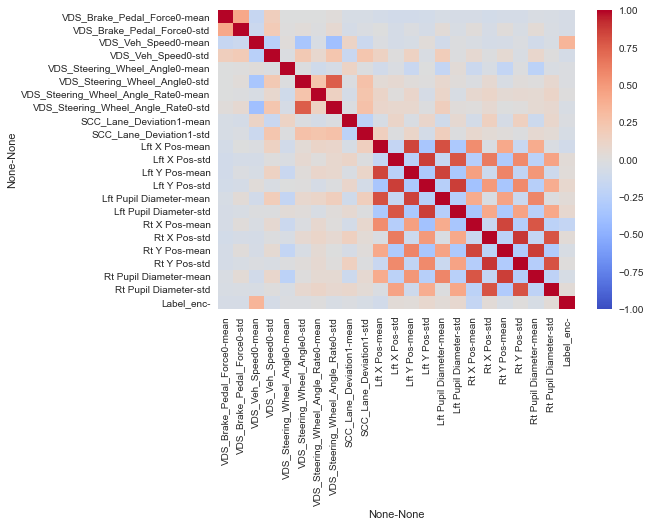

In [5]:
p=sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm")

In [6]:
X = df.drop(['Label', 'Label_enc'], axis=1)
Y = df[['Label_enc']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=MY_SEED)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

print(Y_train[:10]) # check if isShuffled

(784, 22) (336, 22) (784, 1) (336, 1)
    Label_enc
             
180         1
120         0
147         3
206         3
96          2
120         2
71          3
238         1
180         2
18          0


In [7]:
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

In [8]:
# CLASSIFIERS
def DTree_clf(max_depth):
    DT_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=MY_SEED)
    DT_clf.fit(X_train_std, Y_train)
    y_pred = DT_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return DT_clf, acc, cm

def RForest_clf(n_estimators=100):
    RF_clf = RandomForestClassifier(n_estimators=n_estimators,random_state=MY_SEED)
    RF_clf.fit(X_train_std, Y_train)
    y_pred = RF_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return RF_clf, acc, cm

def kNNeighbors_clf(n_neighbors=2):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train_std, Y_train)
    y_pred = knn_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return knn_clf, acc, cm

def SVC_linear_clf(c=0.01):
    # C parameter - greater the missclassification penalty, slower the process
    # kernel - more complicated the kernel, slower the process (rbf is the most complex from the predefined ones)
    svc_clf = SVC(kernel='linear', C=c, random_state=MY_SEED)
    svc_clf.fit(X_train_std, Y_train)
    y_pred = svc_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return svc_clf, acc, cm

def SVC_rbf_clf(c=1, gamma=0.01):
    # gamma: Kernel coefficient, smaller will be more linear
    svc_rbf_clf = SVC(kernel='rbf', C=c, gamma=gamma,random_state=MY_SEED)
    svc_rbf_clf.fit(X_train_std, Y_train)
    y_pred = svc_rbf_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return svc_rbf_clf, acc, cm

def NBayes_clf():
    gnb_clf = naive_bayes.GaussianNB()
    gnb_clf.fit(X_train_std, Y_train)
    y_pred = gnb_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return gnb_clf, acc, cm

def LogReg_clf(penalty='elasticnet', c=1.0):
    # C parameter - like SVM, smaller means strong regularization
    lr_clf = LogisticRegression(penalty=penalty, C=c, random_state=MY_SEED)
    lr_clf.fit(X_train_std, Y_train)
    y_pred = lr_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return lr_clf, acc, cm

In [9]:
Y_train_sq = Y_train.squeeze(1)
print('Y_train_sq.shape', Y_train_sq.shape)

Y_test_sq = Y_test.squeeze(1)
print('Y_test_sq.shape', Y_test_sq.shape)

Y_train_sq.shape (784,)
Y_test_sq.shape (336,)


## SVC LINEAR

In [10]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],               
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(random_state=MY_SEED), param_grid, verbose = 0, cv=3, scoring='accuracy')
# fitting the model for grid search 
grid.fit(X_train_std, Y_train_sq)
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=1, kernel='linear', random_state=13)
{'C': 1, 'kernel': 'linear'}


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


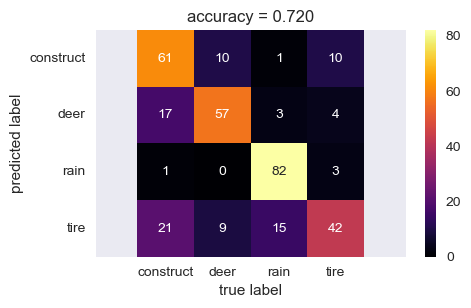

In [11]:
best_SVM_lin = grid.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_SVM_lin.predict(X_test_std)
acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

## SVM RBF

In [12]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20], 
              'gamma': [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20],
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(random_state=MY_SEED), param_grid, verbose = 0, cv=3, scoring='accuracy')
# fitting the model for grid search 
grid.fit(X_train_std, Y_train_sq)
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
gamma_cv = grid.best_params_['gamma']
print(grid.best_estimator_) 
print(grid.best_params_)

SVC(C=20, gamma=0.1, random_state=13)
{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


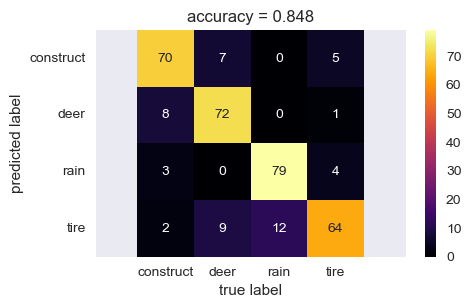

In [13]:
best_SVM_rbf = grid.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_SVM_rbf.predict(X_test_std)
acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

## kNN

In [14]:
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy')
grid.fit(X_train_std, Y_train_sq)
#
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']
print(grid.best_estimator_) 
print(grid.best_params_)

kNN best param =  {'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
{'n_neighbors': 1}


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


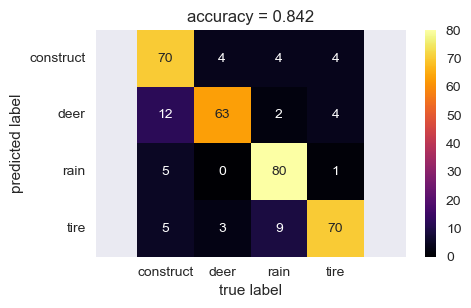

In [15]:
best_knn = grid.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_knn.predict(X_test_std)

acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

## D-TREE

In [16]:
param_grid = {
    "criterion":("gini", "entropy", 'log_loss'), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 100))), 
    "min_samples_split":[ 2, 3, 4, 6, 8, 10, 15, 20], 
    "min_samples_leaf":list(range(1, 20, 2)), 
}
clf = DecisionTreeClassifier(random_state=MY_SEED)
tree_cv = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, Y_train_sq)
print(tree_cv.best_estimator_) 
print(tree_cv.best_params_)

Fitting 3 folds for each of 47520 candidates, totalling 142560 fits
DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=13)
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.46173457 0.43878506 0.46173457 ...        nan        nan        nan]
  warnings.warn(


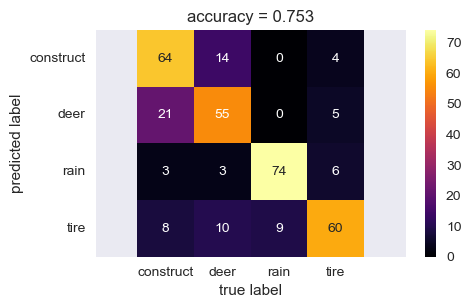

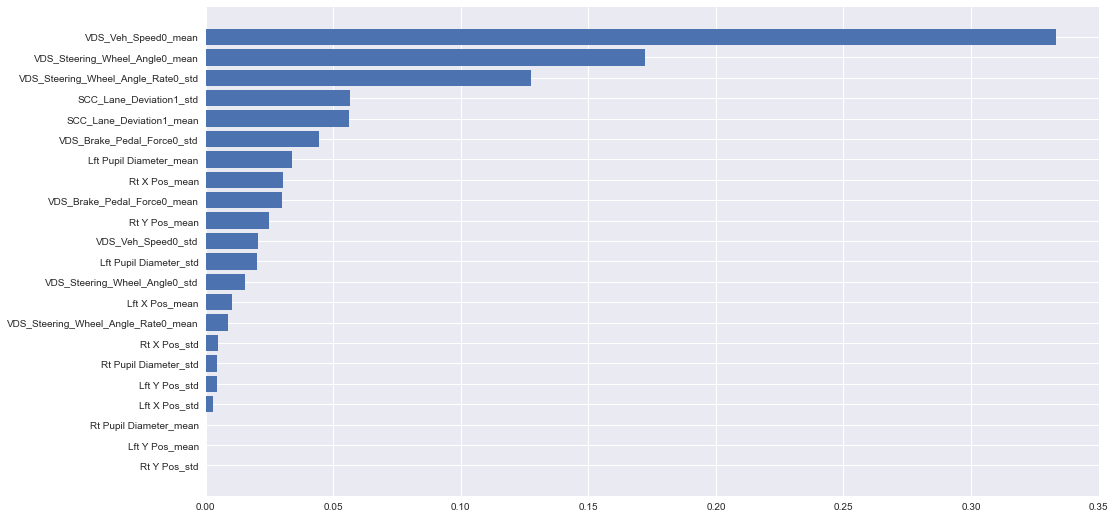

In [17]:
best_DT = tree_cv.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_DT.predict(X_test_std)

acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

cols_name = ['_'.join(list(X_train.columns[i])) for i in range(len(X_train.columns))]
plt_feat_important(cols_name[:], best_DT.feature_importances_[:])

## R-FOREST

In [18]:
param_grid = {
    'n_estimators': [40,60,80,100,150,200,400],
    'criterion':['gini','entropy'],
    'max_depth': [6, 8, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 10, 20],
}
#Random forest classifier
clf = RandomForestClassifier(random_state=MY_SEED)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_std, Y_train_sq)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 80}
RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=80,
                       random_state=13)


C:\Users\quannh\AppData\Local\Temp/ipykernel_9560/1560513070.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_RF = grid_search.best_estimator_.fit(X_train_std, Y_train)


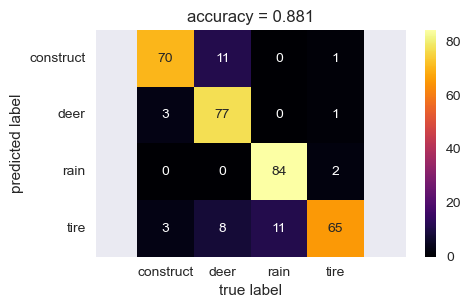

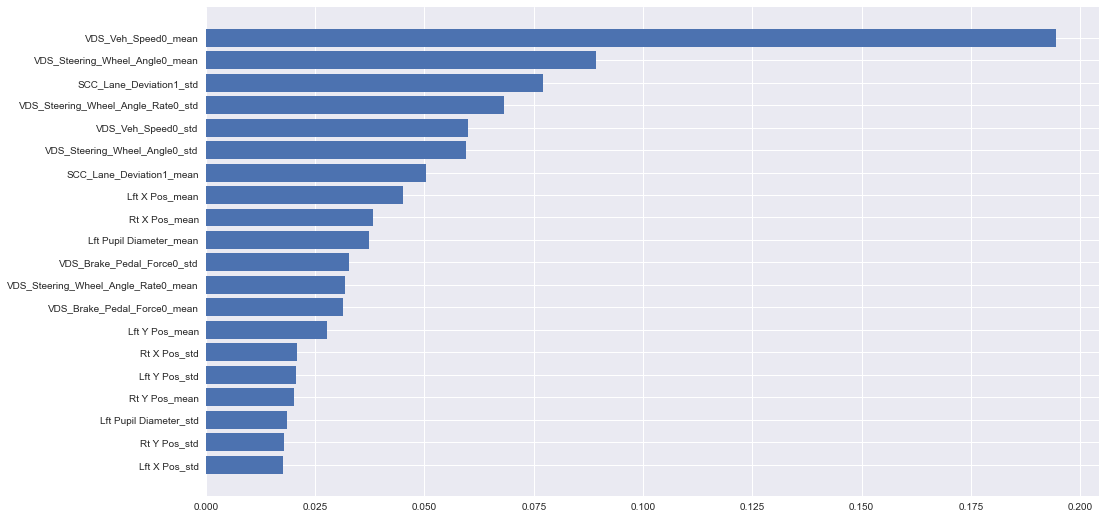

In [19]:
best_RF = grid_search.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_RF.predict(X_test_std).ravel()

acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

cols_name = ['_'.join(list(X_train.columns[i])) for i in range(len(X_train.columns))]
plt_feat_important(cols_name[:20], best_RF.feature_importances_[:20])

## N-BAYES

In [20]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

gnb_clf = naive_bayes.GaussianNB()

grid_search = GridSearchCV(estimator=gnb_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_std, Y_train_sq)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'var_smoothing': 0.002848035868435802}
GaussianNB(var_smoothing=0.002848035868435802)


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


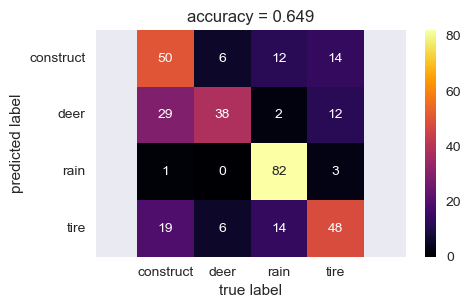

In [21]:
best_GB = grid_search.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_GB.predict(X_test_std)

acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)

## L-REGRESSION

In [22]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],
    'solver': ['liblinear']
}

lr_clf = LogisticRegression(random_state=MY_SEED)

grid_search = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_std, Y_train_sq)
print(grid_search.best_params_)
print(grid_search.best_estimator_) 

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.5, penalty='l1', random_state=13, solver='liblinear')


c:\Users\quannh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


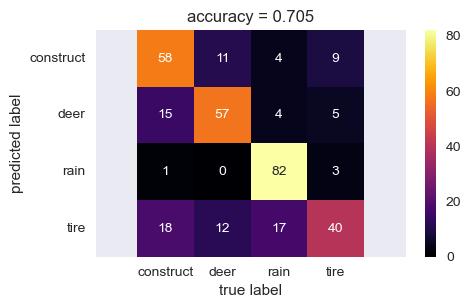

In [23]:
best_LR = grid_search.best_estimator_.fit(X_train_std, Y_train)
y_pred = best_LR.predict(X_test_std)

acc = accuracy_score(Y_test_sq, y_pred)
cm = confusion_matrix(Y_test_sq, y_pred)
plt_conf_matrix(acc, cm, le.classes_)